In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.shape

(2000, 21)

Text(0.5, 1.0, 'Correlation ')

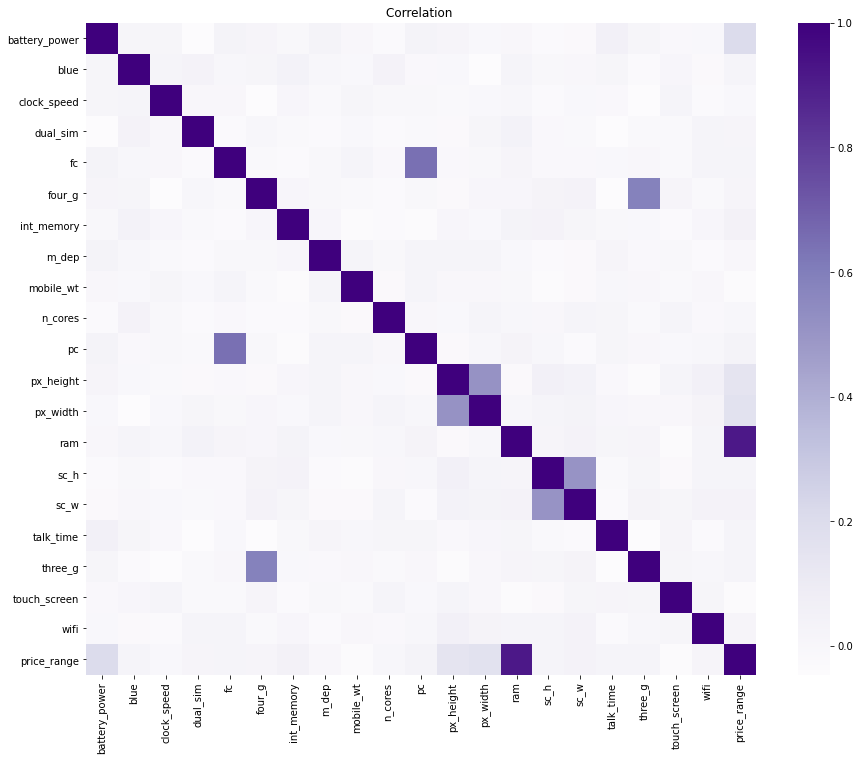

In [5]:
corr=train.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [6]:
#price range correlation
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

<AxesSubplot:>

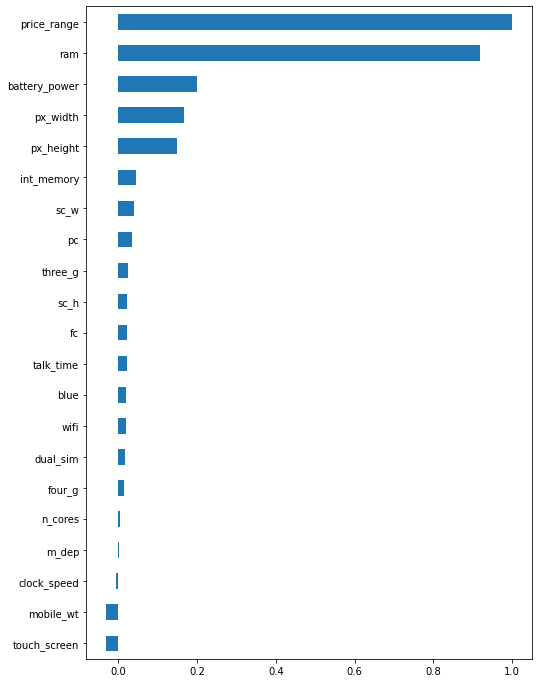

In [7]:
plt.figure(figsize=(8,12))
corr['price_range'].sort_values().plot(kind='barh')

In [8]:
# Battery power, RAM and price range plt

chart=alt.Chart(train).mark_circle(size=20).encode(
    x='ram',
    y='battery_power',
    color='price_range:N',
    tooltip=["price_range", "ram",'battery_power']
).interactive().properties(
    width=400, height=300
)
chart

alt.Chart(...)

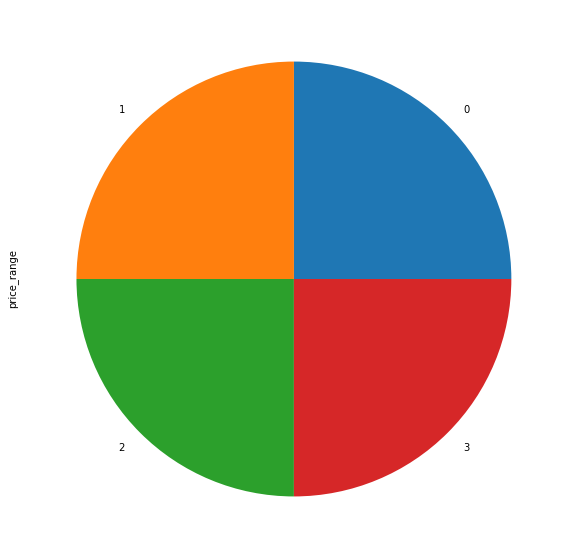

In [9]:
# Price range distribution -- The data set is balanced
plot = train['price_range'].value_counts().plot.pie(figsize=(10, 10), subplots=True)